# The Battle of Neighborhood: Japan Hostels

### Table of Content:  
1. [Introduction/Business Understanding](#1.-Introduction/Business-Understanding)
2. [Analytic Approach](#2.-Analytic-Approach)
3. [Data Requirements](#3.-Data-Requirements)
4. [Data Preparation/Pre-processing](#4.-Data-Preparation/Pre-processing)
5. [Analysis](#5.-Analysis)
6. [Conclusion](#6.-Conclusion)

<img src="images/tokyo.jpg" width="65%"/>

## 1. Introduction/Business Understanding

#### 1.1 Background

Working as a Lead Engineer is quite tiring especially before releases and higher management meetings. Thankfully, I've developed a hobby which let's me unwind and at the same time helps me build a global perspective. As someone who loves travelling, finding ways to save money and travel low-cost is essential. There's little to save while booking flights and I'd rather pay more to traveling comfortably on a 16Hr flight than try to save and wear myself down even before the trip begins! But we can always save a few bucks on accomodation.

A hostel is a low-budget accommodation shared among travelers. Staying at hostels is an extremely affordable option for travelers. Not only that, It also gives you a chance to expereince which you would never at a hotel. I've found that experiencing hostel life one of the best ways to travel the world on a budget and here’s why:
1. You'll save a lot of money trust me.
2. Meet other like-minded travellers and make new friends around the world!
3. Most hostels organize lot of social activites

#### 1.2 Problem Description:

Hostel accomodation is a booming industry with the latest rise in tourism worldwide, especially in Asia. Over 20% of the total tourists worldwide are aged between 19-25. And around 80% of them prefer to spend less on accomodation by opting for hostels. This means the demand for hostels is only going to grow further and more people would want to get their legs in the game. 
- How should a new business person decide where to open a hostel?
- What factors should he look at before investing?
- Which neighborhood venues affect a user's rating for *location* of hostel?

At the same time, it is difficult for a travellers, especially first-timers, to select a hostel from among many options. Hostel reviews are subjective and differ from person-to-person and one cannot solely depend on them to make a decision. It is especially important to consider other aspects like price and neighborhood, which can greatly influence one's experience of the city/country.
I will try to answer the following questions 
- How does price vary with location?
- Where are the <i>'value of money'</i> hostels located?
- How does proximity to transportation affect hostel rating?
- Which hostels are most secure and where are they located?
- Suggest similar hostel but which cheaper price

Tourism in Japan in on a rise. It is expected that the number of foreign tourists coming to Japan will be increasing till 2020 when Olympic will be held in Tokyo. Hence, for this project, we will be looking at hostels in Japan, in particular, Tokyo.

#### 1.3 Target Audience

This project will serve two groups of audience:
1. **Travellers:** Help them make an informed decision while choosing a hostel by providing an in-depth analysis of hostels and their neighborhood.
2. **Business Person:** Provide useful information and models which can help them where to open their first/next hostel.

## 2. Analytic Approach
I will be taking two approaches in the project.

Firstly, I will use *exploratory data analysis(EDA)* to uncover hidden properties of data and provide useful insights to the reader, both future traveller and investor.

Secondly, I will use *prescriptive analytics* to help a business person decide a location for new hostel. I will use *clustering* (KMeans)

## 3. Data Requirements

One city will be analysed in this project : **Tokyo**.

Following are the datasets used in the project along with the reasons for choosing them:

**1. [Japan Hostel Dataset](https://www.kaggle.com/koki25ando/hostel-world-dataset)**: This dataset was web scraped from Hostelworld by Koki Ando and is available on Kaggle. This is the core dataset with which I'll work.

**2. [Foursquare API](https://developer.foursquare.com/docs/api)**: This API will help me get the venues around the hostel which I will use for EDA and clustering.

**3. [Tokyo Land Price](https://utinokati.com/en/details/land-market-value/area/Tokyo/)**: I will scrape this website to get land prices of various neighborhoods in Tokyo.

*__Note:__ Since there is a quota limit on Foursquare, I'll be downloading the data and storing it locally as csv for future use. So we do not have to pull same data again when we restart the data.*

Firstly, I will use the list of hostels from *Hostel dataset* and use *Foursquare API* to get venues around the Hostel. I will then use EDA to explore the neighborhood and how it affects the price of the hostel. I will also use the combined dataset to cluster similar hostels as per pricing and neighborhood. 

Second, I will combine the above data with the land price for the area in which the Hostel is situated and them develop clustering and regression models to predict where a new hostel should be opened and how much should it be priced at.

 ## 4. Data Preparation/Pre-processing

Let's import all the dependencies before we begin. If we need more, we will add them at a later point. I'll first add whatever I can think of.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy import OpenCage
from sklearn.cluster import KMeans

%matplotlib inline

#### 4.1. Hostel Dataset:

Let's first deal with hostels datsaet. I will read the first dataset into a dataframe. For ease of access, I've already downloaded the dataset as csv from Kaggle. You can access the same [here](https://www.kaggle.com/koki25ando/hostel-world-dataset).

In [2]:
hostel_df = pd.read_csv('data/Hostel.csv')
hostel_df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


We will drop the 1st column and rename other columns to make them more readable.

In [3]:
columns = ['Name', 'City', 'StartPrice', 'DistanceFromCityCentre', 'OverallScore', 
           'RatingCategory', 'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 
           'Security', 'Staff', 'ValueForMoney', 'Longitude', 'Latitude']

In [4]:
hostel_df.drop(['Unnamed: 0'], axis=1, inplace=True)
hostel_df.columns = columns
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [5]:
print("Number of Hostels: ", hostel_df.shape[0])

Number of Hostels:  342


Let's check if any hostels are missing location data since that is essential for our analysis.

In [6]:
print("Num of hostels with missing Longitude: ", hostel_df.Longitude.isna().sum())

Num of hostels with missing Longitude:  44


In [7]:
print("Num of hostels with missing Latitude: ", hostel_df.Latitude.isna().sum())

Num of hostels with missing Latitude:  44


In [8]:
# Remove hostels with missing latitude and longitude 
hostel_df = hostel_df[hostel_df.Longitude.isna() == False]
hostel_df = hostel_df[hostel_df.Latitude.isna() == False]
hostel_df.shape

(298, 15)

If we see the DistanceFromCityCentre column, we see that it has distance as well as text, let's remove the unwanted text.

In [9]:
hostel_df.DistanceFromCityCentre = hostel_df.DistanceFromCityCentre.replace(r'[^\d\.]+', '', regex=True)
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


Let's do a final check if any more values are missing and what we want to do about them

In [10]:
hostel_df.count()

Name                      298
City                      298
StartPrice                298
DistanceFromCityCentre    298
OverallScore              298
RatingCategory            298
Atmosphere                298
Cleanliness               298
Facilities                298
Location                  298
Security                  298
Staff                     298
ValueForMoney             298
Longitude                 298
Latitude                  298
dtype: int64

<br>Noice! No more missing values.  
Let's check the if the datatype of each column in proper

In [11]:
hostel_df.dtypes

Name                       object
City                       object
StartPrice                  int64
DistanceFromCityCentre     object
OverallScore              float64
RatingCategory             object
Atmosphere                float64
Cleanliness               float64
Facilities                float64
Location                  float64
Security                  float64
Staff                     float64
ValueForMoney             float64
Longitude                 float64
Latitude                  float64
dtype: object

In [12]:
# Convert DistanceFromCityCentre to float64
hostel_df.DistanceFromCityCentre = hostel_df.DistanceFromCityCentre.astype('float')
hostel_df.dtypes

Name                       object
City                       object
StartPrice                  int64
DistanceFromCityCentre    float64
OverallScore              float64
RatingCategory             object
Atmosphere                float64
Cleanliness               float64
Facilities                float64
Location                  float64
Security                  float64
Staff                     float64
ValueForMoney             float64
Longitude                 float64
Latitude                  float64
dtype: object

In [13]:
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


Let's create a new dataframe for tokyo hostels.

In [14]:
tokyo_hostels_df = hostel_df[hostel_df.City == "Tokyo"]

<br>Everything looks good here. Let's move on to fetch neighborhood data using Foursquare API.

<br>  

#### 4.2 Neighborhood Data(Foursquare):

In [98]:
search_url = 'https://api.foursquare.com/v2/venues/search'
explore_url = 'https://api.foursquare.com/v2/venues/explore'

I've stored my foursqaure credentials in a file which I am reading below

In [99]:
with open("data/creds.json", 'r') as f:
    creds = json.load(f)
CLIENT_ID = creds['id'] # your Foursquare ID
CLIENT_SECRET = creds['secret'] # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [100]:
sample_hotel = hostel_df.loc[0]
sample_hotel.Name

'"Bike & Bed" CharinCo Hostel'

In [66]:
params = dict(
  client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET,
  v=VERSION,
  ll=f"{sample_hotel.Latitude}, {sample_hotel.Longitude}",
  radius=500,
  limit=100,
  sortByPopularity=1
)

In [108]:
def get_recommended_venues(name, lattitude, longitude, limit=100, radius=500):
    venues = []
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
        ll=f"{lattitude}, {longitude}",
        radius=radius,
        limit=limit,
        sortByPopularity=1
    )
    data = requests.get(explore_url, params=params).json()['response']['groups'][0]['items']
    for v in data:
        v = v['venue']
        primary_cat = ""
        for c in v['categories']:
            if(c['primary']):
                primary_cat=c['name']
        venues.append({
            'HostelName':name, 
            'VenueName': v['name'], 
            'Category': primary_cat, 
            'VenueLatitue': v['location']['lat'], 
            'VenueLongtitude': v['location']['lng']
        })
    return venues

In [114]:
venue_list = []

In [115]:
for name, lat, long in zip(hostel_df.Name, hostel_df.Latitude, hostel_df.Longitude):
    venue_list.extend(get_recommended_venues(name, lat, long))
    i = len(venue_list)
    print(i)

70
170
252
288
319
382
456
488
528
628
701
758
844
868
902
962
1062
1162
1262
1358
1458
1531
1584
1664
1761
1795
1843
1912
1926
1978
2000
2100
2200
2300
2400
2500
2600
2700
2743
2843
2943
3043
3143
3167
3267
3367
3467
3521
3566
3666
3733
3816
3860
3904
4004
4034
4066
4166
4190
4290
4364
4442
4507
4551
4623
4654
4754
4830
4906
5006
5032
5056
5156
5207
5254
5301
5381
5439
5539
5573
5589
5614
5638
5672
5727
5764
5800
5900
5930
5939
5983
6083
6131
6158
6200
6221
6272
6318
6342
6442
6465
6499
6553
6653
6753
6819
6877
6923
6965
7037
7092
7125
7173
7212
7278
7378
7454
7554
7622
7722
7764
7809
7861
7861
7883
7926
7994
8017
8073
8103
8130
8183
8229
8329
8429
8491
8536
8557
8657
8725
8805
8905
8960
9058
9119
9215
9261
9361
9457
9518
9556
9611
9640
9740
9798
9898
9998
10089
10143
10183
10236
10323
10344
10351
10451
10534
10565
10665
10710
10762
10850
10950
11050
11150
11246
11346
11446
11546
11622
11693
11737
11824
11851
11903
11998
12047
12094
12103
12108
12185
12231
12331
12359
12394
12426
1243

KeyError: 'groups'

In [118]:
venues_df = pd.DataFrame(venue_list)
venues_df = venues_df.rename(columns={'VenueLatitue': 'VenueLatitude', 'VenueLongtitude': 'VenueLongitude'})
venues_df.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
0,"""Bike & Bed"" CharinCo Hostel",Lawson (ローソン S OSL谷町四丁目駅北店),Convenience Store,34.683282,135.517281
1,"""Bike & Bed"" CharinCo Hostel",モナコ,Café,34.683210,135.517309
2,"""Bike & Bed"" CharinCo Hostel",7-Eleven (セブンイレブン 大阪谷町3丁目店),Convenience Store,34.683509,135.517793
3,"""Bike & Bed"" CharinCo Hostel",McDonald's (マクドナルド 地下鉄谷町四丁目店),Fast Food Restaurant,34.683109,135.517443
4,"""Bike & Bed"" CharinCo Hostel",City Plaza Osaka (シティプラザ大阪),Hotel,34.684020,135.510206


Let's create a new dataframe for venues for hostels in tokyo.

In [704]:
tokyo_venues_df = venues_df[venues_df.HostelName.isin(tokyo_hostels_df.Name)]

In [708]:
tokyo_venues_df.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
70,&And Hostel Akihabara,Akihabara Station (秋葉原駅),Train Station,35.698357,139.773120
71,&And Hostel Akihabara,Yodobashi-Akiba (ヨドバシカメラ マルチメディアAkiba),Electronics Store,35.698713,139.774761
72,&And Hostel Akihabara,THE IDOLM@STER Official Shop (アイドルマスター オフィシャルシ...,Toy / Game Store,35.698364,139.772298
73,&And Hostel Akihabara,JR Sōbu Line Akihabara Station (JR 総武線 秋葉原駅),Train Station,35.698358,139.773288
74,&And Hostel Akihabara,Akihabara Electric Town Exit (秋葉原駅 電気街口),Train Station,35.698818,139.772570


In [707]:
tokyo_venues_df.shape

(6626, 5)

<br>

#### 4.3 Land Price Data(Foursquare):

I will scrape the following URL to get land prices in tokyo - https://utinokati.com/en/details/land-market-value/area/Tokyo/

In [216]:
land_price_url = 'https://utinokati.com/en/details/land-market-value/area/Tokyo/'

data = BeautifulSoup(requests.get(land_price_url).content)

In [217]:
price_df = pd.read_html(data.find('table', {'class':'table-condensed'}).prettify())[0]

In [218]:
price_df.drop(['#', 'Average Trading Price'], axis=1, inplace=True)
price_df.rename(columns={'Average Unit Price': 'PricePerSqMeter', 'Area': 'Neighborhood'}, inplace=True)
price_df.PricePerSqMeter = price_df.PricePerSqMeter.apply(lambda x: x.strip(' JPY/sq.m').replace(',', '')).astype(int)

In [219]:
price_df.head()

,Neighborhood,PricePerSqMeter
0,Chiyoda-Ku,1890610
1,Chuo-Ku,3178147
2,Minato-Ku,2339310
3,Shinjuku-Ku,930080
4,Bunkyo-Ku,966787


Let's see all the neighborhoods

In [220]:
print(price_df.Neighborhood.sort_values())

20              Adachi-Ku
47            Akiruno-Shi
29           Akishima-Shi
17             Arakawa-Ku
4               Bunkyo-Ku
0              Chiyoda-Ku
30              Chofu-Shi
1                 Chuo-Ku
22             Edogawa-Ku
28              Fuchu-Shi
38              Fussa-Shi
23           Hachioji-Shi
46             Hamura-Shi
42      Higashikurume-Shi
35    Higashimurayama-Shi
40      Higashiyamato-Shi
34               Hino-Shi
45              Inagi-Shi
18            Itabashi-Ku
21          Katsushika-Ku
16                Kita-Ku
41             Kiyose-Shi
33            Kodaira-Shi
32            Koganei-Shi
36          Kokubunji-Shi
39              Komae-Shi
7                 Koto-Ku
52         Kozushima-Mura
37          Kunitachi-Shi
31            Machida-Shi
9               Meguro-Ku
2               Minato-Ku
26             Mitaka-Shi
43    Musashimurayama-Shi
25          Musashino-Shi
13              Nakano-Ku
19              Nerima-Ku
51           Niijima-Mura
49          

Let's remove -ku suffix from all the neighborhood names

In [223]:
price_df.Neighborhood.replace("(Ku)", "", regex=True, inplace=True)

In [229]:
price_df.head()

,Neighborhood,PricePerSqMeter
0,Chiyoda,1890610
1,Chuo,3178147
2,Minato,2339310
3,Shinjuku,930080
4,Bunkyo,966787


The hostels dataset doesn't contain information on the locality of the hostel. We'll use reverse geocoding for this purpose. I'm using a free account on OpenCage for this purpose.

We'll try the API with one Hostel and then write function to do the same for all hostels in tokyo.

In [21]:
temp = tokyo_hostels_df.iloc[1]
temp.to_frame().T

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8,7.5,7.5,7.5,7,8,6.5,139.784,35.7127


In [22]:
from opencage.geocoder import OpenCageGeocode

geo = OpenCageGeocode("28b371af498445e8842797870bb8dbbb")

In [23]:
results = geo.reverse_geocode(temp.Latitude, temp.Longitude)

In [24]:
results[0]['formatted']

'Yanaka, Taito, Tokyo 110-8766, Japan'

In [26]:
import time

address = []
for lat, long in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude):
    loc = geo.reverse_geocode(lat, long)[0]
    address.append(loc['formatted'])
    time.sleep(1)

In [116]:
neighborhood = []
for addr in tokyo_hostels_df.Address:
    for nb in price_df.Neighborhood:
        if nb.lower() in addr.lower():
            neighborhood.append(nb)
            break
    else:
        print("No nb found for ", addr)
        neighborhood.append(np.nan)


No nb found for  Kawasaki Ward, Kawasaki, Kanagawa Prefecture 210-0023, Japan
No nb found for  JGH Hostel., 35, Kawaguchi, Saitama Prefecture 332-0026, Japan


We will remove these two hostels from our dataset since we don't have the name of their neighborhood.

In [117]:
print("Current number of hostels: ", tokyo_hostels_df.shape[0])

Current number of hostels:  116


In [118]:
tokyo_hostels_df['Neighborhood'] = neighborhood

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
tokyo_hostels_df = tokyo_hostels_df[tokyo_hostels_df.Neighborhood.isna() == False]

In [120]:
print("New number of hostels: ", tokyo_hostels_df.shape[0])

New number of hostels:  114


In [121]:
tokyo_hostels_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,Address,Neighborhood
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,"3-chome, Chiyoda, Tokyo 101-0025, Japan",Chiyoda
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,"Yanaka, Taito, Tokyo 110-8766, Japan",Taito
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,"Taito, Tokyo 111-0021, Japan",Taito
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,"Taito, Tokyo 110-0004, Japan",Taito
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,"328 Hostel&Lounge, 8 Shuto Expressway Route 1 ...",Ota


#### 4.4 Persist all datasets for later use

In [126]:
hostel_df.to_pickle('data/hostels_cleaned.pkl')
venues_df.to_pickle('data/hostel_venues.pkl')
price_df.to_pickle('data/tokyo_land_prices.pkl')
tokyo_hostels_df.to_pickle('data/tokyo_hostels.pkl')
tokyo_venues_df.to_pickle('data/tokyo_hostels_venues.pkl')

<hr><br>

## 5. Analysis

### Loading data

In [2]:
hostel_df = pd.read_pickle('data/hostels_cleaned.pkl')
price_df = pd.read_pickle('data/tokyo_land_prices.pkl')
tokyo_hostels_df = pd.read_pickle('data/tokyo_hostels.pkl')
tokyo_venues_df = pd.read_pickle('data/tokyo_hostels_venues.pkl')
venues_df = pd.read_pickle('data/hostel_venues.pkl')

### 5.1 Exploratory Data Analysis
Using EDA, we will try to answer the following questions:
- How does price vary with location?
- Which hostels are most secure and where are they located?
- Where are the <i>'value of money'</i> hostels located?
- How does proximity to transportation affect hostel rating?

Let's first start by analyzing which cities are covered in our dataset

In [3]:
hostel_df.City.value_counts()

Tokyo           116
Osaka            89
Kyoto            66
Fukuoka-City     14
Hiroshima        13
Name: City, dtype: int64

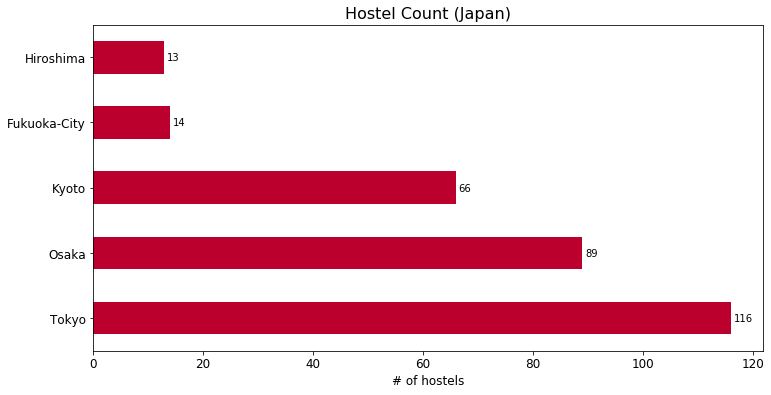

In [4]:
plt.figure(figsize=(12, 6))
ax = hostel_df.City.value_counts().plot(kind="barh", color="#BC002D", fontsize=12)
ax.set_title("Hostel Count (Japan)", fontsize=16)
ax.set_xlabel("# of hostels", fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + 0.2))

<br>Tokyo has the most number of hostels which is understandable since it is once of the largest cities of the world and hence might attract a lot of visitors through its airport

<br>Going ahead, our focus will only be tokyo hostels

In [16]:
tokyo_hostels_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,Address,Neighborhood
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,"3-chome, Chiyoda, Tokyo 101-0025, Japan",Chiyoda
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,"Yanaka, Taito, Tokyo 110-8766, Japan",Taito
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,"Taito, Tokyo 111-0021, Japan",Taito
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,"Taito, Tokyo 110-0004, Japan",Taito
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,"328 Hostel&Lounge, 8 Shuto Expressway Route 1 ...",Ota


In [6]:
tokyo_hostels_df.shape

(114, 17)

<br>Let's visualize all these hostels on the map

In [7]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# add markers to map
for lat, lng, label in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude, tokyo_hostels_df.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#BC002D',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

<hr><br>

#### Chloropleth: Hostel Density

Let's visualize how many hostels are located in each neighborhood

In [8]:
hostels_density = tokyo_hostels_df.groupby('Neighborhood')['Name'].count().to_frame().reset_index()
hostels_density.columns = ['Neighborhood', 'Count']
hostels_density.sort_values(['Count'], ascending=False)[:5]

,Neighborhood,Count
16,Taito,39
3,Chuo,14
15,Sumida,11
14,Shinjuku,9
2,Chiyoda,8


In [9]:
import geopandas

hostels_density.Neighborhood = hostels_density.Neighborhood + ' Ku'
gdf = geopandas.read_file('data/tokyo.json')
gdf = gdf.merge(hostels_density, left_on="area", right_on="Neighborhood")
gdf.head()

,area,area_en,code,geometry,Neighborhood,Count
0,Adachi Ku,Tokubu,131211.0,"POLYGON ((139.82105 35.81508, 139.82168 35.814...",Adachi Ku,2
1,Bunkyo Ku,Tokubu,131059.0,"POLYGON ((139.76093 35.73221, 139.76100 35.732...",Bunkyo Ku,2
2,Chiyoda Ku,Tokubu,131016.0,"POLYGON ((139.77014 35.70535, 139.77017 35.705...",Chiyoda Ku,8
3,Taito Ku,Tokubu,131067.0,"POLYGON ((139.80971 35.72814, 139.80971 35.727...",Taito Ku,39
4,Shinagawa Ku,Tokubu,131091.0,"MULTIPOLYGON (((139.71920 35.64185, 139.71935 ...",Shinagawa Ku,2


In [10]:
import branca

colormap = branca.colormap.LinearColormap(
    colors=['#FFF9C4','#FFF176','#FFCA28','#FF9800','#D84315'],
    index=gdf['Count'].quantile([0.25, 0.5, 0.7, 0.9]),
    vmin=hostels_density.Count.min(),
    vmax=hostels_density.Count.max()
)

colormap.caption="Hostel Density in Tokyo"

In [11]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

gj = folium.GeoJson(
    gdf,
    style_function=lambda x: {'fillColor': colormap(x['properties']['Count']), 'color': '#000',
                                                    'weight':0.25, 'fillOpacity':0.75},
    tooltip=folium.GeoJsonTooltip(fields=['Neighborhood', 'Count'], 
                                  aliases=['Neighborhood', 'Num of Hostels'], 
                                  localize=True)
).add_to(tokyo_map)

tokyo_map

/opt/miniconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


It is evident from the above map that __Taito__ and __Chuo__ are host to many hostels. Hostel density is highest in these neighborhoods

Let's checkout the most expensive neighborhoods and number of hostels in that region:

In [13]:
gdf_new = gdf[['Neighborhood', 'Count']]
gdf_new.Neighborhood = gdf.Neighborhood.str.strip(" Ku")
cnt_price_df = gdf_new.merge(price_df, on="Neighborhood").sort_values('PricePerSqMeter', ascending=False).reset_index(drop=True)
cnt_price_df.head()

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Neighborhood,Count,PricePerSqMeter
0,Chuo,14,3178147
1,Minato,3,2339310
2,Chiyoda,8,1890610
3,Shibuya,4,1328586
4,Taito,39,1028047


Let's checkout the least expensive neighborhoods and number of hostels in that region:

In [14]:
cnt_price_df.tail()

,Neighborhood,Count,PricePerSqMeter
10,Nakano,3,599453
11,Sumida,11,586675
12,Ota,4,540823
13,Edogawa,1,321519
14,Adachi,2,291044


Now, let's take a look at all the neighborhoods

In [15]:
cnt_price_df.sort_values(['Count', 'PricePerSqMeter'])

,Neighborhood,Count,PricePerSqMeter
13,Edogawa,1,321519
6,Meguro,1,845562
14,Adachi,2,291044
9,Setagaya,2,653804
7,Shinagawa,2,742731
5,Bunkyo,2,966787
10,Nakano,3,599453
1,Minato,3,2339310
12,Ota,4,540823
8,Toshima,4,689177


In [16]:
(1028047 - 586675) / 1028047

0.42933056562589067

- Sumida-Ku seems to be popular since it ranks third in the list of number of hostels and at the same time, it is the 4th cheapest neighborhood in our list
- The price of property(per sq. meter) in Sumita-Ku is almost 43% less than that in Taito-ku, which combined wih the fact that it is close to Taito-ku and has fewer hostels than Taito-ku, makes it an exciting prospect for new investors.

<hr><br>

##### Q. How does price vary with distance from city center?
As per me, the closer a hostel to the city center, the higher it's price. Let's see if we can prove that using data.

In [17]:
tokyo_hostels_df.StartPrice.value_counts()

2000       13
2500       12
2200       10
3000        8
3300        6
2400        6
1800        5
2600        5
2100        5
2300        4
3600        4
2900        4
1600        3
2700        3
3200        3
1500        3
3800        2
4000        2
1900        2
3700        2
4100        2
5400        1
3400        1
5500        1
7600        1
3500        1
6300        1
1003200     1
5200        1
1300        1
3900        1
Name: StartPrice, dtype: int64

We can see that one hostel has a very high starting price! Can a hostel charge 1003200 Yen? Doesn't seem likely. Hence, we will remove that row from the dataset.

In [18]:
tokyo_hostels_df = tokyo_hostels_df[tokyo_hostels_df.StartPrice < 1000000]

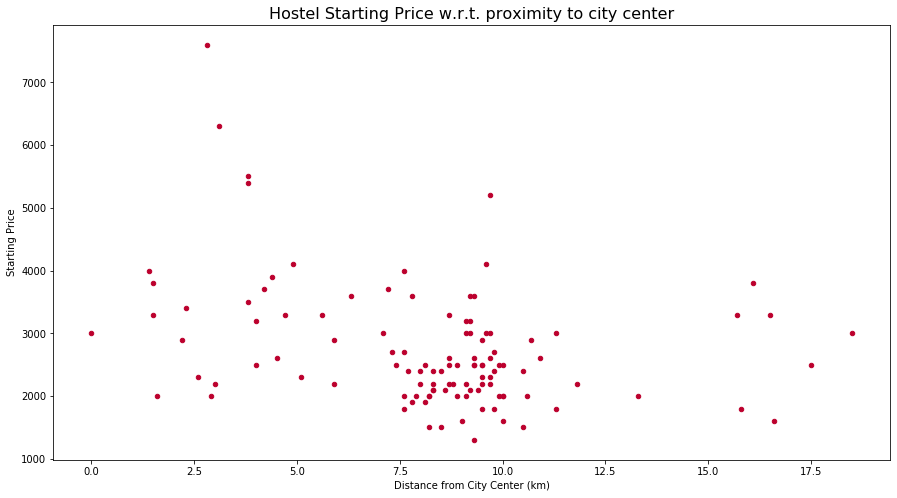

In [19]:
tokyo_hostels_df.plot(x='DistanceFromCityCentre', y='StartPrice', kind='scatter', figsize=(15, 8), color='#BC002D')
plt.xlabel("Distance from City Center (km)")
plt.ylabel("Starting Price")
plt.title("Hostel Starting Price w.r.t. proximity to city center", fontsize=16)
plt.show()

We cannot see any pattern which can help us verify our assumption. If our assumption was correct, we should be be seeing a curve which decreases as distance increases. However, there is on such curve visible.

Let's check the correlation score of StartPrice with DistanceFromCityCentre

In [20]:
tokyo_hostels_df[['StartPrice', 'DistanceFromCityCentre']].corr()

,StartPrice,DistanceFromCityCentre
StartPrice,1.00000,-0.32931
DistanceFromCityCentre,-0.32931,1.00000


The correlation coefficient is very less. Hence, we can say that the starting price of hostels does not vary according to its distance from the city center.

> **The starting price of hostels does not vary much depending on its distance from the city center.**

<hr><br>

##### Q. Which hostels are most secure and where are they located?
I have no idea as to where the most secure hostels are located. Let's find out!

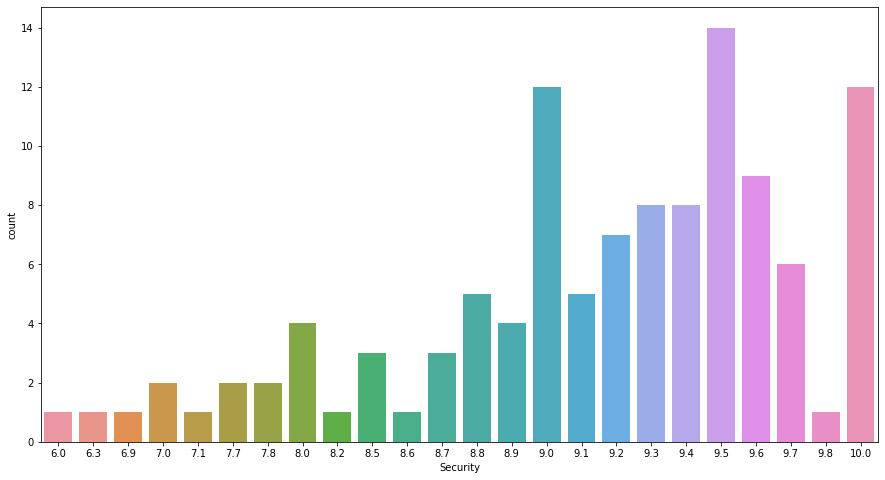

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x=tokyo_hostels_df.Security)

As we can see, most hostels are quite secure as rated by users, so that's some great news for travellers. Let's put hostels with security rating 9.5 and above on the map.

In [22]:
highsec_hostels = tokyo_hostels_df[tokyo_hostels_df.Security > 9]
lowsec_hostels = tokyo_hostels_df[tokyo_hostels_df.Security <= 9]


In [23]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# add markers to map
for lat, lng, label in zip(highsec_hostels.Latitude, highsec_hostels.Longitude, highsec_hostels.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#33cc33',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
# add markers to map
for lat, lng, label in zip(lowsec_hostels.Latitude, lowsec_hostels.Longitude, lowsec_hostels.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#BC002D',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

Let's try to visualize 

In [24]:
highsec_hostel_areas = highsec_hostels.groupby('Neighborhood')['Name'].count().to_frame().reset_index()
highsec_hostel_areas.rename(columns={'Name': 'Count'}, inplace=True)
highsec_hostel_areas['Total'] = tokyo_hostels_df[tokyo_hostels_df.Neighborhood.isin(highsec_hostel_areas.Neighborhood)].groupby('Neighborhood')['Name'].count().values

In [25]:
highsec_hostel_areas['% High Security'] = np.round(highsec_hostel_areas.Count/highsec_hostel_areas.Total, decimals=2)*100
highsec_hostel_areas.sort_values(['% High Security', 'Count'], ascending=False)

,Neighborhood,Count,Total,% High Security
10,Shibuya,4,4,100.0
4,Katsushika,3,3,100.0
1,Bunkyo,2,2,100.0
5,Kita,2,2,100.0
6,Meguro,1,1,100.0
3,Chuo,12,14,86.0
13,Sumida,9,11,82.0
7,Minato,2,3,67.0
14,Taito,25,39,64.0
2,Chiyoda,5,8,62.0


We can see that Katsushika, Kita, Meguro, Shibuya and Shinagawa have 100% safe hostels. Let's see them on a map and check if they are nearby.

In [26]:
highsec_gdf = gdf[gdf.Neighborhood.isin(highsec_hostel_areas[highsec_hostel_areas['% High Security']==100].Neighborhood + ' Ku')]
highsec_gdf

,area,area_en,code,geometry,Neighborhood,Count
1,Bunkyo Ku,Tokubu,131059.0,"POLYGON ((139.76093 35.73221, 139.76100 35.732...",Bunkyo Ku,2
7,Shibuya Ku,Tokubu,131130.0,"POLYGON ((139.68399 35.69199, 139.68445 35.692...",Shibuya Ku,4
8,Kita Ku,Tokubu,131172.0,"POLYGON ((139.69767 35.79845, 139.69828 35.798...",Kita Ku,2
14,Meguro Ku,Tokubu,131105.0,"POLYGON ((139.71764 35.64166, 139.71764 35.641...",Meguro Ku,1
15,Katsushika Ku,Tokubu,131229.0,"POLYGON ((139.85879 35.79444, 139.85899 35.794...",Katsushika Ku,3


In [27]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

gj = folium.GeoJson(
    highsec_gdf,
    style_function=lambda x: {'fillColor': '#BC002D', 'color': '#000',
                                                    'weight':0.25, 'fillOpacity':0.5},
    tooltip=folium.GeoJsonTooltip(fields=['Neighborhood', 'Count'], 
                                  aliases=['Neighborhood', 'Num of Hostels'], 
                                  localize=True)
).add_to(tokyo_map)

tokyo_map

/opt/miniconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


> **Hostels with the very high security score are in Katsushika, Kita, Meguro, Shibuya and Shinagawa**

<hr><br>

##### Q. Where are the 'value of money' hostels located?

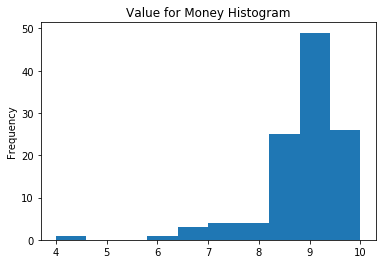

In [28]:
tokyo_hostels_df.ValueForMoney.plot(kind="hist")
plt.title("Value for Money Histogram")
plt.show()

Let's place hostels with highest 'value for money' rating

In [29]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)
high_vfm = tokyo_hostels_df[tokyo_hostels_df.ValueForMoney == 10]
low_vfm = tokyo_hostels_df[tokyo_hostels_df.ValueForMoney <= 8]

# add markers to map
for lat, lng, label in zip(high_vfm.Latitude, high_vfm.Longitude, high_vfm.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#33cc33',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

In [30]:
low_vfm.StartPrice.mean()

3390.909090909091

In [31]:
high_vfm.StartPrice.mean()

2781.818181818182

In [32]:
print("Distance from city center:")
print("Low Value for money: ", round(low_vfm.DistanceFromCityCentre.mean(), 2))
print("High Value for money: ", round(high_vfm.DistanceFromCityCentre.mean(), 2))

Distance from city center:
Low Value for money:  7.76
High Value for money:  9.9


<br>
Let's visualise neighborhoods according to value for money score.

In [33]:
nbr_vfm = tokyo_hostels_df.groupby('Neighborhood')['ValueForMoney'].mean().reset_index()
nbr_vfm.Neighborhood =  nbr_vfm.Neighborhood + " Ku"
vfm_gdf = pd.merge(gdf, nbr_vfm, on='Neighborhood')
vfm_gdf.head()

,area,area_en,code,geometry,Neighborhood,Count,ValueForMoney
0,Adachi Ku,Tokubu,131211.0,"POLYGON ((139.82105 35.81508, 139.82168 35.814...",Adachi Ku,2,9.150000
1,Bunkyo Ku,Tokubu,131059.0,"POLYGON ((139.76093 35.73221, 139.76100 35.732...",Bunkyo Ku,2,8.850000
2,Chiyoda Ku,Tokubu,131016.0,"POLYGON ((139.77014 35.70535, 139.77017 35.705...",Chiyoda Ku,8,9.275000
3,Taito Ku,Tokubu,131067.0,"POLYGON ((139.80971 35.72814, 139.80971 35.727...",Taito Ku,39,8.979487
4,Shinagawa Ku,Tokubu,131091.0,"MULTIPOLYGON (((139.71920 35.64185, 139.71935 ...",Shinagawa Ku,2,8.650000


In [34]:
colormap = branca.colormap.LinearColormap(
    colors=['#FFF9C4', '#F0F4C3', '#DCE775','#689F38'],
    index=vfm_gdf['ValueForMoney'].quantile([0.1, 0.2, 0.75, 0.9]),
    vmin=hostels_density.Count.min(),
    vmax=hostels_density.Count.max()
)


In [35]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

gj = folium.GeoJson(
    vfm_gdf,
    style_function=lambda x: {'fillColor': colormap(x['properties']['ValueForMoney']), 'color': '#000',
                                                    'weight':0.25, 'fillOpacity':0.75},
    tooltip=folium.GeoJsonTooltip(fields=['Neighborhood', 'ValueForMoney'], 
                                  aliases=['Neighborhood', 'Value for Money'], 
                                  localize=True)
).add_to(tokyo_map)

tokyo_map

- **High value for money hostels are comparatively cheaper and are located away from the city center** 
- **Hostels in Chiyoda are near city center and have high value for money rating as well**

<hr><br>

##### Q. Cheap hostels near metro stations?

We will remove rows with Empty VenueCategory

In [43]:
tokyo_venues_df.Category.replace('', np.nan, inplace=True)
tokyo_venues_df.dropna(inplace=True)
tokyo_venues_df.drop(['Unnamed: 0'], axis=1, inplace=True)
tokyo_venues_df.shape

(6626, 5)

Let's check the frequency of each Venue Category

In [44]:
tokyo_venues_df.Category.value_counts()

Convenience Store      571
Ramen Restaurant       371
Japanese Restaurant    302
Café                   271
Sake Bar               271
                      ... 
Laundromat               1
Temple                   1
Pool                     1
Men's Store              1
Memorial Site            1
Name: Category, Length: 263, dtype: int64

<br> Let's check the average number of venues per Hostel

In [45]:
tokyo_venues_df.groupby('HostelName').count()

,VenueName,Category,VenueLatitude,VenueLongitude
HostelName,,,,
&And Hostel Akihabara,100,100,100,100
&And Hostel Ueno,82,82,82,82
&And Hostel-Asakusa North-,36,36,36,36
1night1980hostel Tokyo,31,31,31,31
328 Hostel & Lounge,63,63,63,63
...,...,...,...,...
Retrometro Backpackers,100,100,100,100
Sakura Hostel Asakusa,100,100,100,100
Sakura Hotel Ikebukuro,100,100,100,100


Let's extract the hostels which are close to Metro Stations.

In [46]:
metro_hostels = tokyo_venues_df[tokyo_venues_df.Category.str.contains('Station')]

metro_hostels

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
0,&And Hostel Akihabara,Akihabara Station (秋葉原駅),Train Station,35.698357,139.773120
3,&And Hostel Akihabara,JR Sōbu Line Akihabara Station (JR 総武線 秋葉原駅),Train Station,35.698358,139.773288
4,&And Hostel Akihabara,Akihabara Electric Town Exit (秋葉原駅 電気街口),Train Station,35.698818,139.772570
100,&And Hostel Ueno,Iriya Entrance (JR上野駅 入谷口),Train Station,35.714337,139.778622
288,328 Hostel & Lounge,ホテル JAL CITY バス乗り場,Bus Station,35.551771,139.748390
627,Anne Hostel Asakusabashi,JR両国駅 西口,Train Station,35.695936,139.792701
702,Anne Hostel Yokozuna,JR両国駅 西口,Train Station,35.695936,139.792701
1212,Astro Station,ステーショナリーと印刷のお店 CHIKUHO,Stationery Store,35.712255,139.704978
1232,Backpackers Hostel K's House Tokyo,Asakusa Line Kuramae Station (A17) (都営浅草線 蔵前駅),Metro Station,35.703633,139.791488
1461,Book And Bed Tokyo Ikebukuro,Loft (池袋ロフト),Stationery Store,35.728704,139.711455


In [47]:
metro_hostels = tokyo_hostels_df[tokyo_hostels_df.Name.isin(metro_hostels.HostelName)]
metro_hostels.shape

(20, 17)

In [48]:
metro_hostels.RatingCategory.value_counts()

Fabulous     10
Superb        9
Very Good     1
Name: RatingCategory, dtype: int64

In [49]:
tokyo_hostels_df.RatingCategory.value_counts()

Superb       63
Fabulous     37
Very Good    11
Good          1
Rating        1
Name: RatingCategory, dtype: int64

In [50]:
print("Hostels located near a metro/train/bus station:")
print(f"{metro_hostels.RatingCategory.value_counts()['Fabulous']/metro_hostels.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a metro/train/bus station:
50.0% were rated Fabulous


In [51]:
print("In general:")
print(f"{tokyo_hostels_df.RatingCategory.value_counts()['Fabulous']/tokyo_hostels_df.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

In general:
32.743362831858406% were rated Fabulous


We can observe above that 50% of the hostels near metro/train/bus stations were rated Fabulous compared to only 33% in general.

This shows that there is some correlation between the proximity to mode of transportation and the overall rating of the hostel

> **The proportion of hostels rated fabulous is more near metro/bus/train stations than in general.**

<br>


##### Which neighborhood venues affect a user's rating for location of hostel?
Let's do a similar analysis for a few categories and see how it affects the user rating. 

We'll do similar analysis for *Convenience Store*, *Restaurant*, *Bar*, *Shopping Mall* categories

In [52]:
hostels_near_store = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(tokyo_venues_df.HostelName[tokyo_venues_df.Category.str.contains('store', case=False)])]

In [53]:
hostels_near_store.RatingCategory.value_counts()

Superb       50
Fabulous     28
Very Good     9
Name: RatingCategory, dtype: int64

In [54]:
print("Hostels located near a convenience store:")
print(f"{hostels_near_store.RatingCategory.value_counts()['Fabulous']/hostels_near_store.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a convenience store:
32.18390804597701% were rated Fabulous


> **Travellers do not bother much about proximity to a convenience store doesn't since it doesn't seem to affect overall hostel rating.**

Let's check for public parks

In [55]:
hostels_near_mall = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(tokyo_venues_df.HostelName[tokyo_venues_df.Category.str.contains('park', case=False)])]

In [56]:
hostels_near_mall.RatingCategory.value_counts()

Superb       34
Fabulous     13
Very Good     6
Name: RatingCategory, dtype: int64

In [57]:
print("Hostels located near a convenience store:")
print(f"{hostels_near_mall.RatingCategory.value_counts()['Fabulous']/hostels_near_mall.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a convenience store:
24.528301886792452% were rated Fabulous


> **Hostels with proximity to a park are quite lowly rated than others. Seems like travellers do not like public parks near hostels.**

In [58]:
hostels_near_site = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(tokyo_venues_df.HostelName[tokyo_venues_df.Category.str.contains('Historic Site', case=False)])]

In [59]:
hostels_near_site.RatingCategory.value_counts()

Superb       5
Fabulous     5
Very Good    2
Name: RatingCategory, dtype: int64

In [60]:
print("Hostels located near a historic site:")
print(f"{hostels_near_site.RatingCategory.value_counts()['Fabulous']/hostels_near_site.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a historic site:
41.66666666666667% were rated Fabulous


> **The proportion of hostels rated fabulous is more near a historic site than in general.**

In [61]:
hostels_near_museum = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(tokyo_venues_df.HostelName[tokyo_venues_df.Category.str.contains('Museum', case=False)])]

In [62]:
hostels_near_museum.RatingCategory.value_counts()

Superb       12
Fabulous      6
Very Good     3
Name: RatingCategory, dtype: int64

In [63]:
print("Hostels located near a historic site:")
print(f"{hostels_near_museum.RatingCategory.value_counts()['Fabulous']/hostels_near_museum.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a historic site:
28.57142857142857% were rated Fabulous


> **Proportion of Hostels with proximity to a museum that are lowly rated is quite high than in general.**

<hr>
<br>


### 5.2 Clustering

Now, we will cluster the hostels twice. Once depending on the different rating parameters and one based on their neighborhood.

Consider the following case, that a traveller has selected a hostel, but he finds that it is full! What options does he have? He/She can either go for a hostel which is similar in rating and price to the one he/she has selected. Or he/she can consider hostels which boast similar neighborhood to the selected one.

We will help traveller in both cases

#### 5.2.1 Clustering based on rating parameters

In [64]:
X = tokyo_hostels_df[['StartPrice', 'DistanceFromCityCentre', 'OverallScore', 
                      'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 
                      'Security', 'Staff', 'ValueForMoney']]

In [65]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [67]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

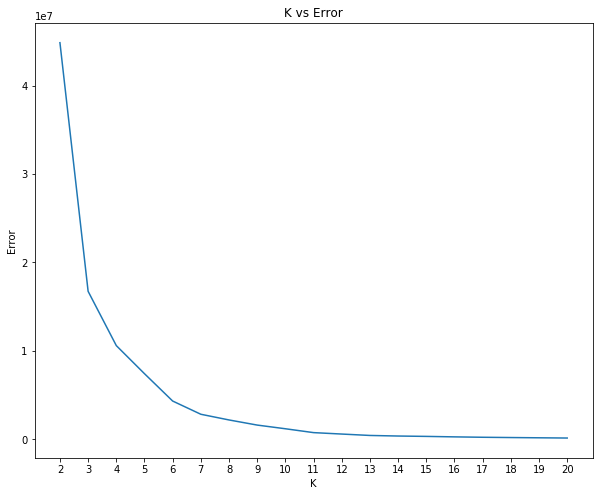

In [68]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

It is evident from the above plot that we have 6 clusters in our data. Let's retrain the model and plot the hostels on the map.

In [69]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
tokyo_hostels_df['RatingCluster'] = kmeans.labels_

In [71]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
markers_colors = []
for lat, lng, name, cluster in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude, tokyo_hostels_df.Name, kmeans.labels_):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

_**Examining Clusters**_

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. But we won't be doing it for all. We'll compare first two clusters for the sake of brevity

##### Cluster 0

In [72]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 0].describe()

,StartPrice,DistanceFromCityCentre,OverallScore,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
mean,5600.000000,5.100000,9.400000,8.975000,9.900000,9.650000,9.325000,9.625000,9.350000,9.050000,139.719876,35.672133,0.0
std,483.045892,3.084369,0.182574,0.298608,0.141421,0.251661,0.518813,0.095743,0.331662,0.412311,0.049455,0.029331,0.0
min,5200.000000,3.100000,9.200000,8.700000,9.700000,9.300000,8.700000,9.500000,8.900000,8.700000,139.692916,35.655097,0.0
25%,5350.000000,3.625000,9.275000,8.850000,9.850000,9.600000,9.000000,9.575000,9.200000,8.700000,139.692970,35.655314,0.0
50%,5450.000000,3.800000,9.400000,8.900000,9.950000,9.700000,9.400000,9.650000,9.450000,9.000000,139.696342,35.658791,0.0
75%,5700.000000,5.275000,9.525000,9.025000,10.000000,9.750000,9.725000,9.700000,9.600000,9.350000,139.723248,35.675611,0.0
max,6300.000000,9.700000,9.600000,9.400000,10.000000,9.900000,9.800000,9.700000,9.600000,9.500000,139.793905,35.715853,0.0


**Traits: Very High Cost. Close to City center. Very high cleaniness and security ratings**

##### Cluster 4

In [73]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 4].describe()

,StartPrice,DistanceFromCityCentre,OverallScore,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
count,14.000000,14.000000,14.000000,14.00000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,3785.714286,6.664286,8.671429,8.15000,8.921429,8.20000,8.757143,8.664286,9.185714,8.785714,139.745607,35.692388,4.0
std,203.269972,3.828156,0.722633,1.11338,1.117813,1.03478,0.672211,1.305378,0.758396,0.995264,0.037821,0.044775,0.0
min,3500.000000,1.400000,6.800000,6.00000,6.700000,6.00000,8.000000,6.000000,7.300000,6.700000,139.693004,35.550492,4.0
25%,3600.000000,4.250000,8.475000,7.92500,8.100000,8.00000,8.000000,7.775000,8.700000,8.450000,139.704999,35.689835,4.0
50%,3750.000000,6.750000,8.950000,8.00000,9.300000,8.50000,8.950000,9.050000,9.300000,8.950000,139.748664,35.704967,4.0
75%,3975.000000,8.850000,9.100000,8.97500,9.700000,9.00000,9.375000,9.600000,9.875000,9.275000,139.777024,35.713089,4.0
max,4100.000000,16.100000,9.400000,10.00000,10.000000,9.30000,9.700000,10.000000,10.000000,10.000000,139.794981,35.731081,4.0


**Traits: High Cost, On avg 7km of City center. All ratings moderately high**

Now suppose that I want to stay at _**Retrometro Backpackers**_. However, when I go to book, it shows that it doesn't have any spots available! Fortunately, I can now use the cluster result to find a hostel similar to Retrometro Backpackers. Let's see what options do I have!

In [74]:
tokyo_hostels_df[tokyo_hostels_df.Name.str.contains("Retrometro")]

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,Address,Neighborhood,RatingCluster
275,Retrometro Backpackers,Tokyo,3000,9.2,9.4,Superb,9.4,9.4,9.0,9.4,9.5,9.8,9.6,139.789362,35.713157,"Retrometro Backpackers, Kappabashi Dogugai Str...",Taito,2


Retrometro Backpackers' RatingCluster is 5. Let's see what options do I have!

In [75]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 2].sort_values(['OverallScore'], ascending=False)[:5]

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,Address,Neighborhood,RatingCluster
132,Hostel bedgasm,Tokyo,2900,9.5,9.6,Superb,9.6,9.8,9.6,9.1,9.5,9.9,9.7,139.789033,35.721350,"Taisho Elementary School, Kimbikan-dori, Taito...",Taito,2
329,Unplan Kagurazaka,Tokyo,3200,4.0,9.5,Superb,9.2,9.9,9.6,8.8,9.6,9.8,9.6,139.731323,35.705065,"Shinjuku, Tokyo 162-0805, Japan",Shinjuku,2
275,Retrometro Backpackers,Tokyo,3000,9.2,9.4,Superb,9.4,9.4,9.0,9.4,9.5,9.8,9.6,139.789362,35.713157,"Retrometro Backpackers, Kappabashi Dogugai Str...",Taito,2
227,Lyuro Tokyo Kiyosumi -The Share Hotels-,Tokyo,3200,9.1,9.4,Superb,9.3,10.0,10.0,7.3,10.0,9.3,10.0,139.792066,35.681217,"LYURO東京清澄, Sumidagawa Sagan-dori, Koto, Tokyo ...",Sumida,2
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,"328 Hostel&Lounge, 8 Shuto Expressway Route 1 ...",Ota,2


- Fortunately I can book a bed at Hostel bedgasm! It is similarly priced and rated as Retrometro Backpackers!

- We can do the same for the other 5 clusters as well, but we are not doing that now.

<hr><br>

#### 5.2.2 Clustering based on neighborhood

Now, we will cluster the same hostels. But this time, we will not use ratings or price instead we will use the neighborhood data and see which hostels have similar surroundings. Some travellers focus more on the location of a place rather than the price or ratings. This can be useful for them.

We will do one-hot encoding for the Category column to convert them to features

In [76]:
category_1hot = pd.get_dummies(tokyo_venues_df.Category)
category_1hot['HostelName'] = tokyo_venues_df.HostelName

# move neighborhood column to the first column
fixed_columns = [category_1hot.columns[-1]] + list(category_1hot.columns[:-1])
category_1hot = category_1hot[fixed_columns]
category_1hot.head()

,HostelName,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
category_1hot.shape

(6626, 264)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [78]:
category_1hot = category_1hot.groupby('HostelName').mean().reset_index()
category_1hot.head()

,HostelName,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,&And Hostel Akihabara,0.000000,0.0,0.01,0.000000,0.0,0.01,0.0,0.0,0.0,...,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.010000,0.0,0.0
1,&And Hostel Ueno,0.000000,0.0,0.00,0.012195,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.012195,0.0,0.0
2,&And Hostel-Asakusa North-,0.000000,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0
3,1night1980hostel Tokyo,0.000000,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.032258,0.0,0.0
4,328 Hostel & Lounge,0.015873,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0


Let's see few Hostels along with the top 5 most common venues

In [79]:
num_top_venues = 5

for nbrhood in category_1hot.HostelName[:5]:
    print("---- "+nbrhood+" ----")
    temp = category_1hot[category_1hot.HostelName == nbrhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- &And Hostel Akihabara ----
                       venue  freq
0                   Sake Bar  0.14
1           Ramen Restaurant  0.09
2                  BBQ Joint  0.04
3  Japanese Curry Restaurant  0.04
4                        Pub  0.03


---- &And Hostel Ueno ----
                 venue  freq
0    Convenience Store  0.17
1     Ramen Restaurant  0.09
2  Japanese Restaurant  0.07
3                Hotel  0.05
4          Coffee Shop  0.05


---- &And Hostel-Asakusa North- ----
               venue  freq
0  Convenience Store  0.22
1              Hotel  0.17
2           Sake Bar  0.08
3             Hostel  0.06
4      Grocery Store  0.06


---- 1night1980hostel Tokyo ----
               venue  freq
0  Convenience Store  0.19
1      Grocery Store  0.10
2           Sake Bar  0.10
3             Hostel  0.10
4       Intersection  0.06


---- 328 Hostel & Lounge ----
                 venue  freq
0    Convenience Store  0.13
1  Japanese Restaurant  0.11
2     Ramen Restaurant  0.10
3        

##### Let's put that into a pandas dataframe

In [80]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [81]:
indicators = ['st', 'nd', 'rd']
num_top_venues = 10

# create columns according to number of top venues
columns = ['HostelName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nbr_venues_sorted_df = pd.DataFrame(columns=columns)
nbr_venues_sorted_df['HostelName'] = category_1hot.HostelName

for ind in np.arange(category_1hot.shape[0]):
    nbr_venues_sorted_df.iloc[ind, 1:] = return_most_common_venues(category_1hot.iloc[ind, :], num_top_venues)

nbr_venues_sorted_df.head()

,HostelName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,&And Hostel Akihabara,Sake Bar,Ramen Restaurant,Japanese Curry Restaurant,BBQ Joint,Train Station,Sushi Restaurant,Dessert Shop,Pub,Café,Chinese Restaurant
1,&And Hostel Ueno,Convenience Store,Ramen Restaurant,Japanese Restaurant,Coffee Shop,Hotel,Café,Soba Restaurant,Chinese Restaurant,Arts & Crafts Store,Italian Restaurant
2,&And Hostel-Asakusa North-,Convenience Store,Hotel,Sake Bar,Hostel,Bus Stop,Grocery Store,Coffee Shop,Nabe Restaurant,Tree,Motel
3,1night1980hostel Tokyo,Convenience Store,Sake Bar,Hostel,Grocery Store,Intersection,Bakery,Restaurant,Deli / Bodega,Donburi Restaurant,Shabu-Shabu Restaurant
4,328 Hostel & Lounge,Convenience Store,Japanese Restaurant,Ramen Restaurant,Hotel,Café,Bus Stop,Sake Bar,Soba Restaurant,Platform,Outdoor Sculpture


#### Clustering Neighborhoods

Let's cluster neighborhoods into 4 types based on venue categories.

In [82]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=15, random_state=8)
X = category_1hot.drop(['HostelName'], axis=1)
X.head()

,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,0.000000,0.0,0.01,0.000000,0.0,0.01,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.010000,0.0,0.0
1,0.000000,0.0,0.00,0.012195,0.0,0.00,0.0,0.0,0.0,0.02439,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.012195,0.0,0.0
2,0.000000,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.032258,0.0,0.0
4,0.015873,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0


In [83]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=15,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [84]:
nbr_venues_sorted_df['Cluster'] = kmeans.labels_
nbr_venues_sorted_df.rename(columns={'HostelName': 'Name'}, inplace=True)

In [85]:
tokyo_hostels_df_merged = pd.merge(tokyo_hostels_df, nbr_venues_sorted_df, on='Name')
tokyo_hostels_df_merged.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,...,Ramen Restaurant,Japanese Curry Restaurant,BBQ Joint,Train Station,Sushi Restaurant,Dessert Shop,Pub,Café,Chinese Restaurant,3
1,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,...,Ramen Restaurant,Japanese Restaurant,Coffee Shop,Hotel,Café,Soba Restaurant,Chinese Restaurant,Arts & Crafts Store,Italian Restaurant,1
2,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,...,Hotel,Sake Bar,Hostel,Bus Stop,Grocery Store,Coffee Shop,Nabe Restaurant,Tree,Motel,1
3,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,...,Sake Bar,Hostel,Grocery Store,Intersection,Bakery,Restaurant,Deli / Bodega,Donburi Restaurant,Shabu-Shabu Restaurant,1
4,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,...,Japanese Restaurant,Ramen Restaurant,Hotel,Café,Bus Stop,Sake Bar,Soba Restaurant,Platform,Outdoor Sculpture,1


__*Finally, let's visualize the resulting clusters*__

In [86]:
# create map
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_hostels_df_merged['Latitude'], tokyo_hostels_df_merged['Longitude'], tokyo_hostels_df_merged['Name'], tokyo_hostels_df_merged['Cluster']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster) + ')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.7).add_to(tokyo_map)

In [87]:
tokyo_map

##### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

**Cluster 0**

In [89]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 0, tokyo_hostels_df_merged.columns[[0] + list(range(18, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
13,Asakusa Hostel Toukaisou,Coffee Shop,Hotel,Convenience Store,Ramen Restaurant,BBQ Joint,Bed & Breakfast,Chinese Restaurant,Wagashi Place,Okonomiyaki Restaurant,Arts & Crafts Store,0
14,Asakusa Ryokan Toukaisou,Coffee Shop,Hotel,Convenience Store,Ramen Restaurant,BBQ Joint,Bed & Breakfast,Chinese Restaurant,Wagashi Place,Okonomiyaki Restaurant,Arts & Crafts Store,0
15,Asakusahotel Wasou,Coffee Shop,Ramen Restaurant,Café,Wagashi Place,Japanese Restaurant,Unagi Restaurant,Soba Restaurant,Hotel,Sukiyaki Restaurant,Bed & Breakfast,0
19,Book And Bed Tokyo Asakusa,Japanese Restaurant,Hotel,Ramen Restaurant,Coffee Shop,Wagashi Place,Café,Unagi Restaurant,Soba Restaurant,Yoshoku Restaurant,Sukiyaki Restaurant,0
21,Bunka Hostel Tokyo,Ramen Restaurant,Japanese Restaurant,Hotel,Coffee Shop,Wagashi Place,Café,Sukiyaki Restaurant,Dessert Shop,Convenience Store,Okonomiyaki Restaurant,0


In [91]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 0]['1st Most Common Venue'].value_counts()

Ramen Restaurant       7
Coffee Shop            5
Japanese Restaurant    5
Convenience Store      3
Café                   2
Hotel                  2
Zoo Exhibit            1
Park                   1
Chinese Restaurant     1
Name: 1st Most Common Venue, dtype: int64

> **1st Cluster Properties: Restaurants and Coffee Shops**

In [93]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 1, tokyo_hostels_df_merged.columns[[0] + list(range(18, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
1,&And Hostel Ueno,Convenience Store,Ramen Restaurant,Japanese Restaurant,Coffee Shop,Hotel,Café,Soba Restaurant,Chinese Restaurant,Arts & Crafts Store,Italian Restaurant,1
2,&And Hostel-Asakusa North-,Convenience Store,Hotel,Sake Bar,Hostel,Bus Stop,Grocery Store,Coffee Shop,Nabe Restaurant,Tree,Motel,1
3,1night1980hostel Tokyo,Convenience Store,Sake Bar,Hostel,Grocery Store,Intersection,Bakery,Restaurant,Deli / Bodega,Donburi Restaurant,Shabu-Shabu Restaurant,1
4,328 Hostel & Lounge,Convenience Store,Japanese Restaurant,Ramen Restaurant,Hotel,Café,Bus Stop,Sake Bar,Soba Restaurant,Platform,Outdoor Sculpture,1
6,Aizuya Inn,Convenience Store,Hotel,Intersection,Park,Bus Stop,Grocery Store,Hostel,Sake Bar,Bed & Breakfast,Shopping Mall,1


In [94]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 1]['1st Most Common Venue'].value_counts()

Convenience Store    38
Name: 1st Most Common Venue, dtype: int64

> **2nd Cluster Properties: Convenience Stores**

In [95]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 2, tokyo_hostels_df_merged.columns[[0] + list(range(18, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
59,J's Backpackers,Intersection,Baseball Field,Gym Pool,Train Station,Noodle House,Diner,Falafel Restaurant,Fast Food Restaurant,Fishing Spot,Fishing Store,2


> **3rd Cluster Neighborhood: Baseball Field and Gym Pool**

In [96]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 3, tokyo_hostels_df_merged.columns[[0] + list(range(18, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,&And Hostel Akihabara,Sake Bar,Ramen Restaurant,Japanese Curry Restaurant,BBQ Joint,Train Station,Sushi Restaurant,Dessert Shop,Pub,Café,Chinese Restaurant,3
5,Ace Inn Shinjuku,Convenience Store,Sake Bar,Ramen Restaurant,BBQ Joint,Bar,Grocery Store,Japanese Restaurant,Café,Tonkatsu Restaurant,Italian Restaurant,3
7,Akihabara Hotel 3000,Sake Bar,Ramen Restaurant,Soba Restaurant,Café,Tonkatsu Restaurant,Japanese Curry Restaurant,Japanese Restaurant,BBQ Joint,Italian Restaurant,Music Store,3
8,Almond hostel & cafe Shibuya,Italian Restaurant,Café,Bakery,Sake Bar,Japanese Restaurant,Park,Dumpling Restaurant,Coffee Shop,BBQ Joint,Portuguese Restaurant,3
9,Anne Hostel Asakusabashi,Chinese Restaurant,Yoshoku Restaurant,Convenience Store,Sake Bar,Steakhouse,Bar,Thai Restaurant,Café,Japanese Restaurant,Nabe Restaurant,3


> **4th Cluster Neighborhood: Bar and Restaurants**

## 6. Conclusion

We got a glimpse of the hostel scene in Tokyo and were able to find out some interesting insights which might be useful to travellers as well as people with business interests. Let's summarize our findings:

- Most hostels are located in Taito-ku and Chuo-ku.
- Sumita-ku seems to be an interesting locality since it is close to Taito-ku and 43% cheaper than Taito-ku.
- The starting price of hostels does not vary much depending on its distance from the city center.
- Most of the hostels rated high for their security are in Katsushika, Kita, Meguro, Shibuya and Shinagawa
- Proximity to a mode of transportation or a historic site positively affects the hostel rating.
- Hostels rated highly for being value for money are comparatively cheaper and are located away from the city center

In addition, we also clustered the hostels, first based on the different rating parameters, and second based on the neighborhood of the hostels. It can useful for travellers to identify a alternate hostel.

There are many things which I have assumed while making the above claims since we were working with limited. I'll try to expand the dataset for a more comprehensive study.

Until then, sayonara!